## Companion code for paper "A Kalman Filter model for synchronization in musical ensembles"

Module versions:
* Numpy version 1.26.4
* Scipy version 1.12.0
* Matplotlib version 3.8.0
* Pandas version  2.1.4

Python version 3.11.7

In [1]:
import numpy as np
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
import pandas as pd

from KF_Ensemble import *

## Import data

In [2]:
data = pd.read_csv('virtuoso_subset.csv')

cols_ioi = ['ioi' + str(n) for n in range(46)]

## Separate different performance styles
y_dp_vn2 = data[(data['condition'] == 'DP') & (data['leader'] == 'VN2') & (data['repetition'] == 12)][cols_ioi].values
y_nr_vn2 = data[(data['condition'] == 'NR') & (data['leader'] == 'VN2') & (data['repetition'] == 12)][cols_ioi].values
y_sp_vn2 = data[(data['condition'] == 'SP') & (data['leader'] == 'VN2') & (data['repetition'] == 12)][cols_ioi].values

## Declare position of each alpha within vector theta
range_alpha1 = range(8, 11)
range_alpha2 = range(11, 14)
range_alpha3 = range(14, 17)
range_alpha4 = range(17, 20)

## Run simulations and plot Figure 1

Matrix is positive-definite!
Matrix is positive-definite!
Matrix is positive-definite!
Matrix is positive-definite!
Matrix is positive-definite!
Matrix is positive-definite!


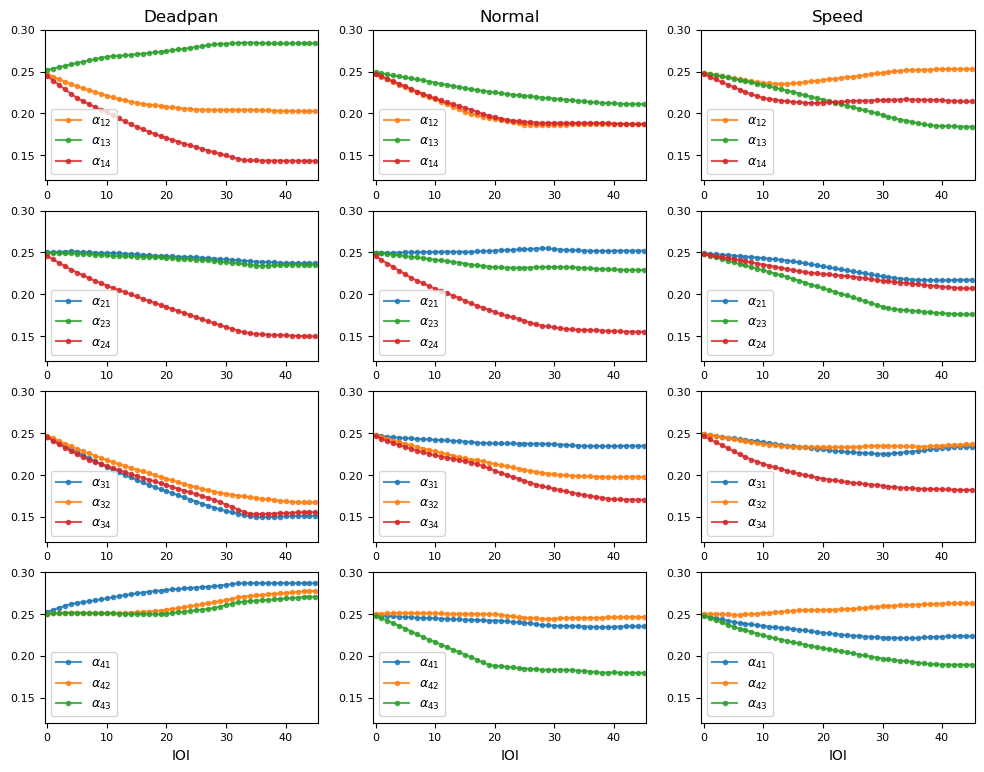

In [3]:
#############
## DEADPAN ##
#############

y = y_dp_vn2

## Covariance matrix for alpha's and beta's
corr_alpha = -0.1
std_alpha = 0.01

corr_beta = 0
std_beta = 1e-20

cov_alpha = cov_mtx_ab(std_alpha, corr_alpha)
cov_beta = cov_mtx_ab(std_beta, corr_beta)

## Observation and system covariance matrices
K = 4

cov_obs = 1e-5*np.identity(K) # V
cov_theta = block_diag(500*np.identity(K), 25*np.identity(K), cov_alpha, cov_beta) # W

## Initialisation for theta
k0 = np.hstack([y[:, 0], y[:, 0], 0.25*np.ones(K*(K - 1)), np.zeros(K*(K - 1))])
C0 = cov_theta

## Filter
KF = KalmanFilterEnsemble(y = y, cov_obs = cov_obs, cov_theta = cov_theta, k0 = k0, C0 = C0)
KF.filter()
KF.smooth()

## Plots
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (12, 9), sharex = False)

cVN1 = '#1f77b4'
cVN2 = '#ff7f0e'
cVA = '#2ca02c'
cVC = '#d62728'

ax[0, 0].set_prop_cycle('color', [cVN2, cVA, cVC])
ax[0, 0].plot(np.array(KF.s)[range_alpha1, :].T,
         label = [r'$\alpha_{12}$', r'$\alpha_{13}$', r'$\alpha_{14}$'],
         alpha = 0.8, marker = '.')
ax[0, 0].legend(loc = 'lower left', fontsize = 9)
ax[0, 0].margins(x=0.01)
ax[0, 0].yaxis.set_tick_params(labelsize=8)
ax[0, 0].xaxis.set_tick_params(labelsize=8)
ax[0, 0].set_title('Deadpan')

ax[1, 0].set_prop_cycle('color', [cVN1, cVA, cVC])
ax[1, 0].plot(np.array(KF.s)[range_alpha2, :].T,
         label = [r'$\alpha_{21}$', r'$\alpha_{23}$', r'$\alpha_{24}$'],
         alpha = 0.8, marker = '.')
ax[1, 0].legend(loc = 'lower left', fontsize = 9)
ax[1, 0].margins(x=0.01)
ax[1, 0].yaxis.set_tick_params(labelsize=8)
ax[1, 0].xaxis.set_tick_params(labelsize=8)

ax[2, 0].set_prop_cycle('color', [cVN1, cVN2, cVC])
ax[2, 0].plot(np.array(KF.s)[range_alpha3, :].T,
         label = [r'$\alpha_{31}$', r'$\alpha_{32}$', r'$\alpha_{34}$'],
         alpha = 0.8, marker = '.')
ax[2, 0].legend(loc = 'lower left', fontsize = 9)
ax[2, 0].margins(x=0.01)
ax[2, 0].yaxis.set_tick_params(labelsize=8)
ax[2, 0].xaxis.set_tick_params(labelsize=8)

ax[3, 0].set_prop_cycle('color', [cVN1, cVN2, cVA])
ax[3, 0].plot(np.array(KF.s)[range_alpha4, :].T,
         label = [r'$\alpha_{41}$', r'$\alpha_{42}$', r'$\alpha_{43}$'],
         alpha = 0.8, marker = '.')
ax[3, 0].legend(loc = 'lower left', fontsize = 9)
ax[3, 0].margins(x=0.01)
ax[3, 0].yaxis.set_tick_params(labelsize=8)
ax[3, 0].xaxis.set_tick_params(labelsize=8)
ax[3, 0].set_xlabel('IOI')

############
## NORMAL ##
############

y = y_nr_vn2

## Covariance matrix for alpha's and beta's
corr_alpha = -0.1
std_alpha = 0.01

corr_beta = 0
std_beta = 1e-20

cov_alpha = cov_mtx_ab(std_alpha, corr_alpha)
cov_beta = cov_mtx_ab(std_beta, corr_beta)

## Observation and system covariance matrices
K = 4

cov_obs = 1e-5*np.identity(K) # V
cov_theta = block_diag(500*np.identity(K), 25*np.identity(K), cov_alpha, cov_beta) # W

## Initialisation for theta
k0 = np.hstack([y[:, 0], y[:, 0], 0.25*np.ones(K*(K - 1)), np.zeros(K*(K - 1))])
C0 = cov_theta

## Filter
KF = KalmanFilterEnsemble(y = y, cov_obs = cov_obs, cov_theta = cov_theta, k0 = k0, C0 = C0)
KF.filter()
KF.smooth()

ax[0, 1].set_prop_cycle('color', [cVN2, cVA, cVC])
ax[0, 1].set_title('Normal')
ax[0, 1].plot(np.array(KF.s)[range_alpha1, :].T,
         label = [r'$\alpha_{12}$', r'$\alpha_{13}$', r'$\alpha_{14}$'],
         alpha = 0.8, marker = '.')
ax[0, 1].legend(loc = 'lower left', fontsize = 9)
ax[0, 1].margins(x=0.01)
ax[0, 1].yaxis.set_tick_params(labelsize=8)
ax[0, 1].xaxis.set_tick_params(labelsize=8)

ax[1, 1].set_prop_cycle('color', [cVN1, cVA, cVC])
ax[1, 1].plot(np.array(KF.s)[range_alpha2, :].T,
         label = [r'$\alpha_{21}$', r'$\alpha_{23}$', r'$\alpha_{24}$'],
         alpha = 0.8, marker = '.')
ax[1, 1].legend(loc = 'lower left', fontsize = 9)
ax[1, 1].margins(x=0.01)
ax[1, 1].yaxis.set_tick_params(labelsize=8)
ax[1, 1].xaxis.set_tick_params(labelsize=8)

ax[2, 1].set_prop_cycle('color', [cVN1, cVN2, cVC])
ax[2, 1].plot(np.array(KF.s)[range_alpha3, :].T,
         label = [r'$\alpha_{31}$', r'$\alpha_{32}$', r'$\alpha_{34}$'],
         alpha = 0.8, marker = '.')
ax[2, 1].legend(loc = 'lower left', fontsize = 9)
ax[2, 1].margins(x=0.01)
ax[2, 1].yaxis.set_tick_params(labelsize=8)
ax[2, 1].xaxis.set_tick_params(labelsize=8)

ax[3, 1].set_prop_cycle('color', [cVN1, cVN2, cVA])
ax[3, 1].plot(np.array(KF.s)[range_alpha4, :].T,
         label = [r'$\alpha_{41}$', r'$\alpha_{42}$', r'$\alpha_{43}$'],
         alpha = 0.8, marker = '.')
ax[3, 1].legend(loc = 'lower left', fontsize = 9)
ax[3, 1].margins(x=0.01)
ax[3, 1].yaxis.set_tick_params(labelsize=8)
ax[3, 1].xaxis.set_tick_params(labelsize=8)
ax[3, 1].set_xlabel('IOI')

###########
## SPEED ##
###########

y = y_sp_vn2

## Covariance matrix for alpha's and beta's
corr_alpha = -0.1
std_alpha = 0.01

corr_beta = 0
std_beta = 1e-20

cov_alpha = cov_mtx_ab(std_alpha, corr_alpha)
cov_beta = cov_mtx_ab(std_beta, corr_beta)

## Observation and system covariance matrices
K = 4

cov_obs = 1e-5*np.identity(K) # V
cov_theta = block_diag(500*np.identity(K), 25*np.identity(K), cov_alpha, cov_beta) # W

## Initialisation for theta
k0 = np.hstack([y[:, 0], y[:, 0], 0.25*np.ones(K*(K - 1)), np.zeros(K*(K - 1))])
C0 = cov_theta

## Filter
KF = KalmanFilterEnsemble(y = y, cov_obs = cov_obs, cov_theta = cov_theta, k0 = k0, C0 = C0)
KF.filter()
KF.smooth()

ax[0, 2].set_prop_cycle('color', [cVN2, cVA, cVC])
ax[0, 2].set_title('Speed')
ax[0, 2].plot(np.array(KF.s)[range_alpha1, :].T,
         label = [r'$\alpha_{12}$', r'$\alpha_{13}$', r'$\alpha_{14}$'],
         alpha = 0.8, marker = '.')
ax[0, 2].legend(loc = 'lower left', fontsize = 9)
ax[0, 2].margins(x=0.01)
ax[0, 2].yaxis.set_tick_params(labelsize=8)
ax[0, 2].xaxis.set_tick_params(labelsize=8)

ax[1, 2].set_prop_cycle('color', [cVN1, cVA, cVC])
ax[1, 2].plot(np.array(KF.s)[range_alpha2, :].T,
         label = [r'$\alpha_{21}$', r'$\alpha_{23}$', r'$\alpha_{24}$'],
         alpha = 0.8, marker = '.')
ax[1, 2].legend(loc = 'lower left', fontsize = 9)
ax[1, 2].margins(x=0.01)
ax[1, 2].yaxis.set_tick_params(labelsize=8)
ax[1, 2].xaxis.set_tick_params(labelsize=8)

ax[2, 2].set_prop_cycle('color', [cVN1, cVN2, cVC])
ax[2, 2].plot(np.array(KF.s)[range_alpha3, :].T,
         label = [r'$\alpha_{31}$', r'$\alpha_{32}$', r'$\alpha_{34}$'],
         alpha = 0.8, marker = '.')
ax[2, 2].legend(loc = 'lower left', fontsize = 9)
ax[2, 2].margins(x=0.01)
ax[2, 2].yaxis.set_tick_params(labelsize=8)
ax[2, 2].xaxis.set_tick_params(labelsize=8)

ax[3, 2].set_prop_cycle('color', [cVN1, cVN2, cVA])
ax[3, 2].plot(np.array(KF.s)[range_alpha4, :].T,
         label = [r'$\alpha_{41}$', r'$\alpha_{42}$', r'$\alpha_{43}$'],
         alpha = 0.8, marker = '.')
ax[3, 2].legend(loc = 'lower left', fontsize = 9)
ax[3, 2].margins(x=0.01)
ax[3, 2].yaxis.set_tick_params(labelsize=8)
ax[3, 2].xaxis.set_tick_params(labelsize=8)
ax[3, 2].set_xlabel('IOI')

for row in range(4):
    for col in range(3):
        ax[row, col].set_ylim(bottom = 0.12, top = 0.3)

plt.show()

# fig.savefig('figure.pdf', format  = 'pdf', dpi = 300, bbox_inches = 'tight')